### **Fashion MNIST**
- Fashion MNIST dataset: Một tập dữ liệu gồm các hình ảnh của các sản phẩm thời trang từ Zalando—bao gồm một tập huấn luyện với 60.000 mẫu và một tập kiểm tra với 10.000 mẫu. Mỗi mẫu là một hình ảnh grayscale kích thước 28x28, được gán nhãn thuộc 1 trong 10 lớp. Zalando thiết kế Fashion-MNIST để thay thế trực tiếp cho tập dữ liệu MNIST gốc nhằm đánh giá các thuật toán học máy. Tập dữ liệu này có cùng kích thước hình ảnh và cấu trúc của các tập huấn luyện và kiểm tra.

- Mục tiêu: Phân loại các hình ảnh grayscale của Fashion-MNIST vào 10 lớp.

# **1. Thư viện**

In [142]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import Dropout, BatchNormalization
from typing import Optional
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.19.0
3.9.0


# **2. Load data**

In [66]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [67]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [68]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [69]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [70]:
y_train[0]

np.uint8(9)

In [71]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_name[y_train[0]]

class_nums = len(class_name)
print(class_nums)

10


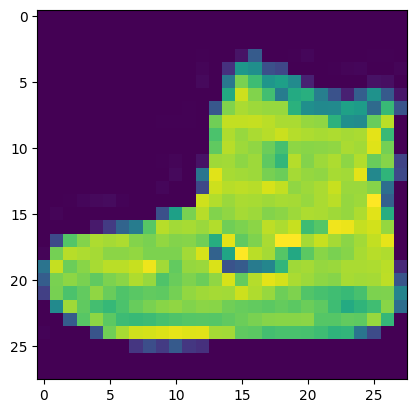

In [72]:
plt.imshow(x_train[0])

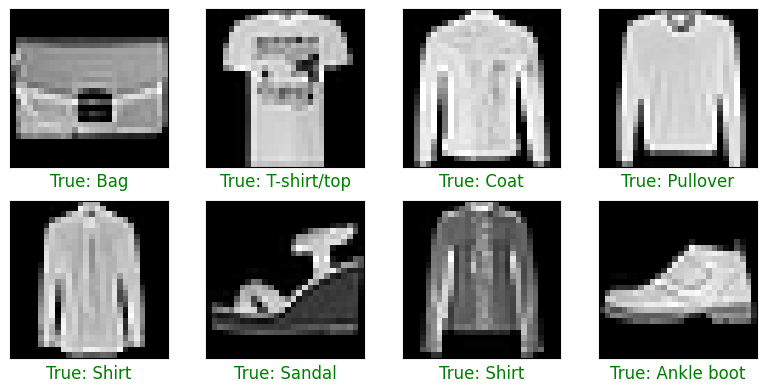

In [73]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray] = None) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4))

    len_x = x_data.shape[0]
    for index in range(nrows * ncols):
        ax = axes[index // ncols, index % ncols]

        img_index = random.randint(0, len_x)

        ax.imshow(x_data[img_index], cmap='gray')
        ax.set(xticks=[], yticks=[])
        color = 'green'
        true_label_str = f"True: {class_name[y_data[img_index]]}"

        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_index])
            predicted__label = class_name[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_index] else 'green'
            predicted_label_str = f"Predicted: {predicted__label}"

        img_titl = true_label_str if y_proba is None else true_label_str + "\n" + predicted_label_str

        ax.set_xlabel(img_titl, color=color, fontsize=12)
    
    plt.tight_layout()
    plt.show()

plot_data(x_train, y_train)

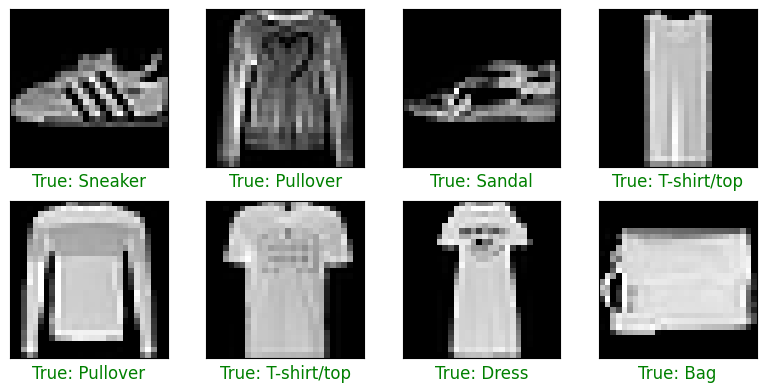

In [74]:
plot_data(x_test, y_test)

# **3. Image Pre_processing**

- Định hình lại dữ liệu: Chuyển dữ liệu sang dạng mà mô hình yêu cầu và chuẩn hóa để tất cả các giá trị nằm trong khoảng [0, 1].

- Chuyển đổi kiểu dữ liệu: Biến đổi từ uint8 sang float32.

In [75]:
# convert to float32 and scale to [0, 1] range for training
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [76]:
x_test.shape, x_test.dtype

((10000, 28, 28), dtype('float32'))

In [77]:
# make sure images have shape (60000, 28, 28) -> (60000, 28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [78]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [79]:
# convert class vectors to binary class matrices: 1 => [0 1 0 0 ...]
# 1                   => sparse_categorical_crossentropy
# [0 1 0 0 ...]       => categorical_crossentropy
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [80]:
y_train[0], y_train_label[0]

(np.uint8(9), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

# **4. Network Architecture (ANN)**

In [81]:
input_shape = (28, 28, 1)

In [285]:
model = models.Sequential(
    [ 
        layers.Flatten(input_shape=input_shape), # (28, 28, 1) -> (784)

        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
        BatchNormalization(),  # Chuẩn hóa giúp ổn định gradient
        Dropout(0.5),  # Giảm overfitting bằng cách ngẫu nhiên bỏ 50% neuron

        
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        
        layers.Dense(class_nums, activation='softmax'), # 10
    ]
)

model.summary()

c:\DEV\python_code\7-Day-Machine-Learning-to-Deep-Learning\Day4_CNN - Phân Loại Hình Ảnh\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,682 (924.54 KB)

 Trainable params: 235,914 (921.54 KB)

 Non-trainable params: 768 (3.00 KB)

In [286]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [287]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [288]:
epochs = 50
batch_size = 256
history = model.fit(x_train, y_train_label,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.1,
            callbacks=[early_stopping],
            )

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6762 - loss: 1.5106 - val_accuracy: 0.8358 - val_loss: 0.8535
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8154 - loss: 0.8536 - val_accuracy: 0.8383 - val_loss: 0.6888
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8333 - loss: 0.6913 - val_accuracy: 0.8553 - val_loss: 0.5672
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8428 - loss: 0.6080 - val_accuracy: 0.8613 - val_loss: 0.5111
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8449 - loss: 0.5592 - val_accuracy: 0.8495 - val_loss: 0.5241
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8448 - loss: 0.5353 - val_accuracy: 0.8663 - val_loss: 0.4544
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8508 - loss: 0.5078 - val_accuracy: 0.8473 - val_loss: 0.5042
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8523 - loss: 0.4951 - val_accuracy: 0.

In [289]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [290]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

ValueError: x and y must have same first dimension, but have shapes (50,) and (11,)

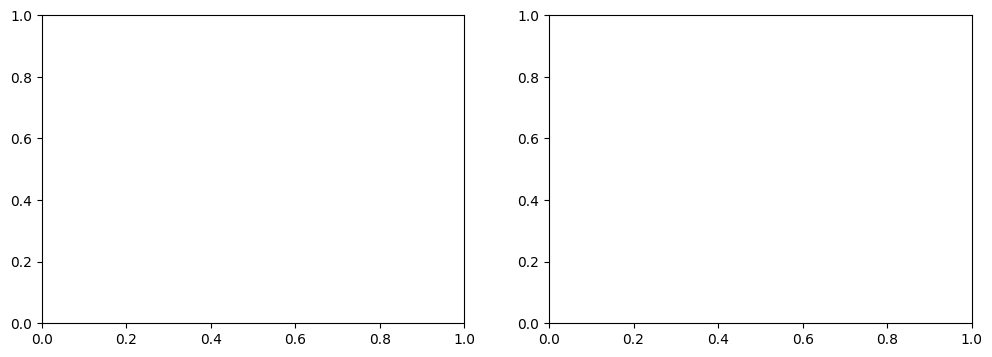

In [291]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
epoch_run = [i + 1 for i in range(epochs)]

ax1.plot(epoch_run, train_loss, label='Trainning Loss')
ax1.plot(epoch_run, val_loss, label='Validation Loss', marker='o')
ax1.set(title='Trainning vs Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_run, train_acc, label='Trainning Accuracy')
ax2.plot(epoch_run, val_acc, label='Validation Accuracy', marker='o')
ax2.set(title='Trainning vs Validation Accuracy', xlabel='Epochs', ylabel='Accuracy')
ax2.legend()

plt.show()

# **4. Model Evaluation**

In [292]:
score = model.evaluate(x_test, y_test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8623 - loss: 0.4717


In [293]:
print(f"Test loss: {score[0]:.4f}\nTest accuracy: {score[1]:.4f}")

Test loss: 0.4815
Test accuracy: 0.8569


# **5. Prediction**

In [294]:
X_sample = x_test[0:3]
Y_proba = model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [295]:
Y_proba

array([[3.74281117e-05, 5.58460597e-05, 2.73106180e-05, 9.10745584e-05,
        4.14573224e-05, 1.56255942e-02, 2.06656659e-05, 4.53330688e-02,
        1.81052063e-04, 9.38586473e-01],
       [1.49213200e-04, 3.13551510e-07, 9.65805829e-01, 4.01828329e-05,
        1.24177355e-02, 7.96805679e-08, 2.15840805e-02, 2.12964537e-07,
        1.93031201e-06, 4.03224391e-07],
       [1.04474657e-06, 9.99997020e-01, 3.15853299e-07, 4.19260004e-07,
        7.95630854e-07, 9.21005281e-08, 5.16701171e-08, 1.01970095e-07,
        2.00785308e-08, 1.29101466e-07]], dtype=float32)

In [296]:
Y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.016, 0.   , 0.045, 0.   ,
        0.939],
       [0.   , 0.   , 0.966, 0.   , 0.012, 0.   , 0.022, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [297]:
predictions = np.argmax(Y_proba, axis=1)

In [298]:
predictions

array([9, 2, 1])

In [299]:
[class_name[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser']

In [300]:
Y_proba = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


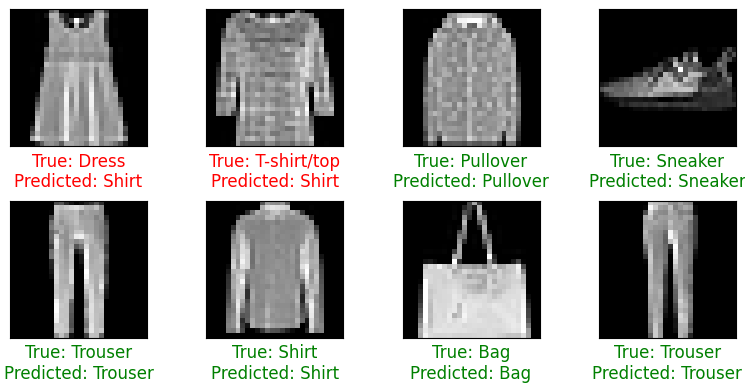

In [301]:
plot_data(x_test, y_test, Y_proba)

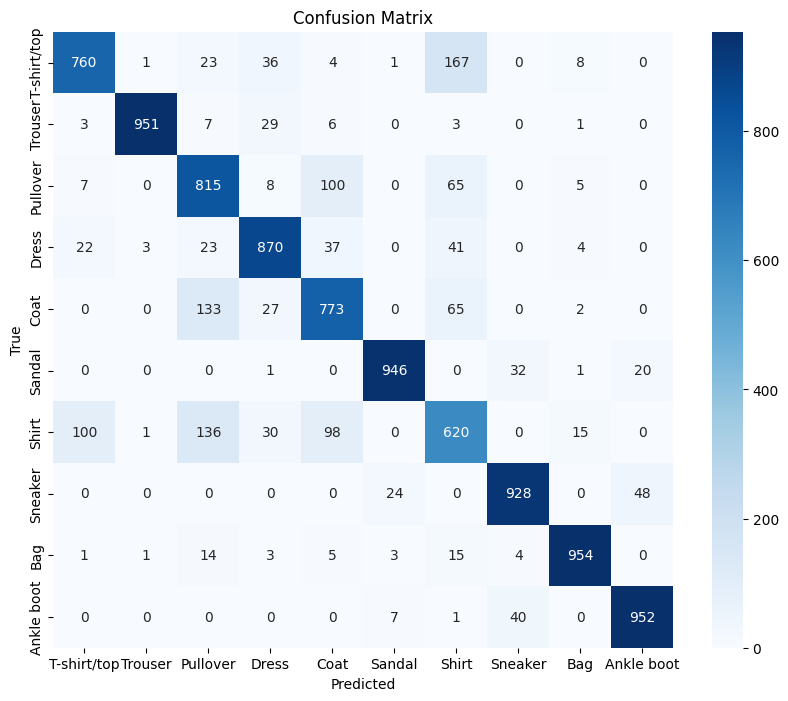

In [302]:


def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

y_pred = np.argmax(Y_proba, axis=1)
y_true = y_test
plot_confusion_matrix(y_true, y_pred, class_name)

In [303]:
def print_classification_report(y_true, y_pred, class_names):
    report = classification_report(y_true, y_pred, target_names=class_names)
    print(report)
print_classification_report(y_true, y_pred, class_name)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.76      0.80      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.71      0.81      0.76      1000
       Dress       0.87      0.87      0.87      1000
        Coat       0.76      0.77      0.76      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.63      0.62      0.63      1000
     Sneaker       0.92      0.93      0.93      1000
         Bag       0.96      0.95      0.96      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


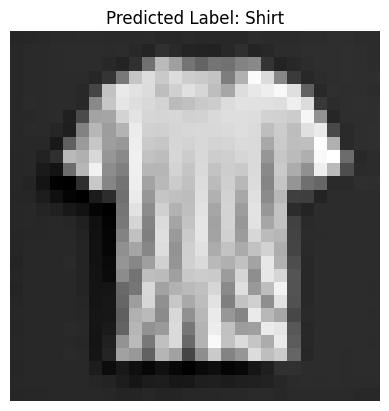

In [304]:
from PIL import Image

# Mở ảnh bằng PIL
img = Image.open("caiao.jpg").convert("L")  # Convert to grayscale
img = img.resize((28, 28))  # Resize đúng với input của model

# Chuyển sang numpy array và normalize
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Dự đoán
predicted_label = model.predict(img_array)
predicted_class = np.argmax(predicted_label)

# Hiển thị
plt.imshow(img, cmap="gray")
plt.title(f"Predicted Label: {class_name[predicted_class]}")
plt.axis("off")
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


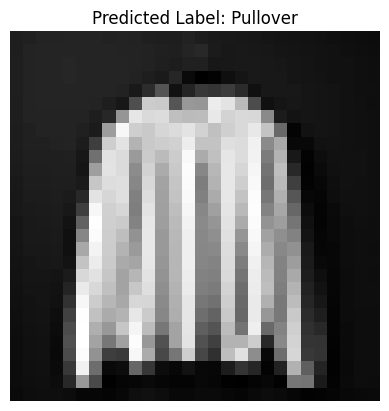

In [305]:
# Mở ảnh bằng PIL
img = Image.open("hi.jpg").convert("L")  # Convert to grayscale
img = img.resize((28, 28))  # Resize đúng với input của model

# Chuyển sang numpy array và normalize
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Dự đoán
predicted_label = model.predict(img_array)
predicted_class = np.argmax(predicted_label)

# Hiển thị
plt.imshow(img, cmap="gray")
plt.title(f"Predicted Label: {class_name[predicted_class]}")
plt.axis("off")
plt.show()

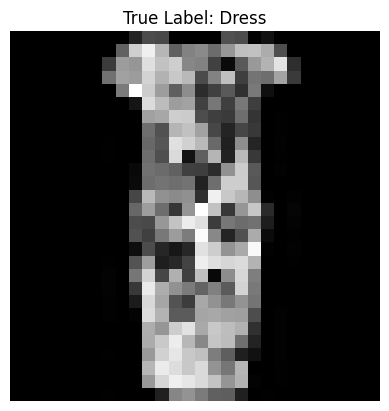

In [ ]:
# test ảnh trong tập dữ liệu
img_index = 100
img = x_test[img_index].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f"True Label: {class_name[y_test[img_index]]}")
plt.show()

